# Replicate James' AR(2) fit in the prediction vs projection paper

In [1]:
import numpy as np

import xarray as xr

import matplotlib
import matplotlib.pyplot as plt

from src import utils, ar_model

In [6]:
matplotlib.rcParams["figure.figsize"] = (14, 3)

In [4]:
f = np.loadtxt("../../data/Cowtan_and_Way_HadCRUT4_kriging_1850-2020.txt")

data = utils.detrend(xr.DataArray(f[:, 1], coords={"time": f[:, 0]}))

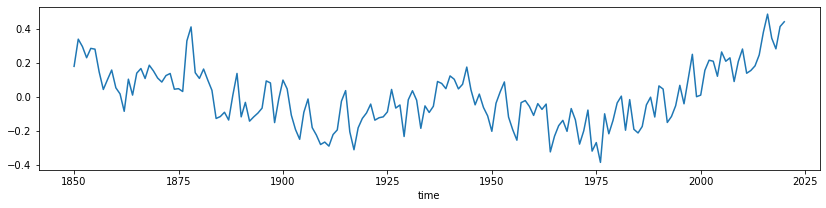

In [7]:
data.plot()

In [8]:
p = ar_model.fit(data, order=2)
print(f"Least-squares coefficients: {p.values[:-1]}")
print(f"Least-squares noise std: {p.values[-1]}")

Least-squares coefficients: [0.70551813 0.10641597]
Least-squares noise std: 0.1058828272608809


In [9]:
p_yw = ar_model.yule_walker(data, order=2)
print(f"Yule-Walker coefficients: {p_yw.values[1:]}")
print(f"Yule-Walker noise std: {p_yw.values[0]}")

Yule-Walker coefficients: [0.71241534 0.07191706]
Yule-Walker noise std: 0.1097568302037144


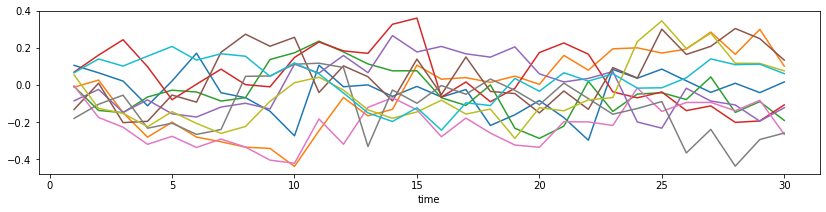

In [10]:
_ = ar_model.generate_samples(p.values[:-1], p.values[-1], 30, 10).plot.line(x="time", add_legend=False)

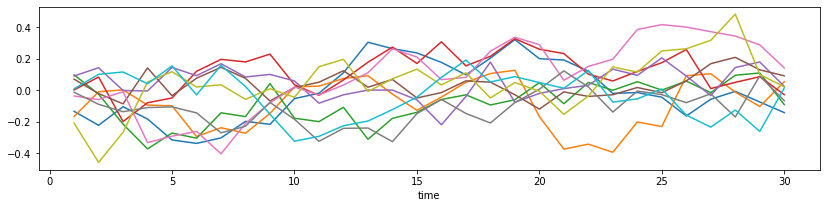

In [11]:
_ = ar_model.generate_samples(p_yw.values[1:], p_yw.values[0], 30, 10).plot.line(x="time", add_legend=False)